In [50]:
from xgboost import XGBClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

In [51]:
X = datasets.fetch_covtype().data[:3000]
y = datasets.fetch_covtype().target[:3000]
X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_va, y_train, y_va = train_test_split(X_1, y_1)

print(X_train.shape, y_train.shape)
print(np.unique(y_train))  # 7分类任务

(2025, 54) (2025,)
[1 2 3 4 5 6 7]


In [52]:
enc = OrdinalEncoder()

# y*.shape = (num_sample, 1)
y_train_enc = enc.fit_transform(y_train.reshape(-1, 1))
y_test_enc = enc.transform(y_test.reshape(-1, 1))
y_va_enc = enc.fit_transform(y_va.reshape(-1, 1))
print(np.unique(y_train_enc))
print(y_train_enc.shape)

[0. 1. 2. 3. 4. 5. 6.]
(2025, 1)


In [53]:
# 不需要指定num_class参数
model = XGBClassifier(
    booster='gbtree',
    n_jobs=-1,  # 对应nthread
    max_depth=6,
    min_child_weight=2,
    gamma=0,
    learning_rate=0.3,
    subsample=1,
    colsample_bytree=0.9,
    colsample_bylevel=0.9,
    reg_alpha=0,
    reg_lambda=0,
    objective='multi:softprob',
    verbosity=0,
    use_label_encoder=False)

In [54]:
model.fit(X_train, y_train_enc,
          eval_set=[(X_train, y_train_enc), (X_va, y_va_enc)],  # 对应evals
          sample_weight=1 / (y_train_enc + 1),  # 对应DMatrix(weight)
          verbose=50,  # 对应evals
          eval_metric='mlogloss',  # 对应eval_metric+feval
          early_stopping_rounds=100,
          )

[0]	validation_0-mlogloss:1.44375	validation_1-mlogloss:1.50328
[50]	validation_0-mlogloss:0.10431	validation_1-mlogloss:0.43656
[99]	validation_0-mlogloss:0.05317	validation_1-mlogloss:0.44595


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.9,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)

In [55]:
# 预测结果(num_sample, )
model.predict(X_test)

array([1, 4, 4, 1, 2, 6, 0, 2, 1, 4, 1, 1, 1, 4, 2, 4, 1, 4, 1, 4, 4, 4,
       2, 0, 1, 1, 1, 0, 0, 3, 0, 1, 0, 4, 3, 1, 1, 1, 1, 1, 4, 2, 1, 1,
       4, 1, 4, 1, 1, 4, 2, 2, 0, 4, 1, 0, 3, 1, 0, 2, 1, 4, 1, 2, 2, 0,
       1, 0, 0, 2, 0, 0, 4, 0, 2, 0, 2, 4, 1, 5, 0, 4, 1, 1, 2, 0, 4, 4,
       0, 1, 2, 0, 3, 2, 4, 1, 3, 1, 5, 1, 1, 0, 4, 4, 1, 5, 1, 2, 4, 4,
       6, 3, 1, 1, 0, 4, 2, 4, 5, 5, 4, 6, 1, 4, 1, 3, 1, 1, 4, 1, 3, 4,
       4, 1, 4, 1, 5, 0, 1, 3, 3, 0, 4, 0, 2, 4, 4, 1, 4, 6, 0, 0, 1, 0,
       1, 4, 4, 4, 1, 1, 1, 4, 5, 1, 4, 3, 1, 5, 1, 2, 4, 0, 1, 4, 3, 0,
       2, 1, 5, 0, 1, 5, 4, 4, 4, 6, 1, 1, 1, 3, 5, 0, 1, 5, 0, 2, 0, 0,
       1, 1, 4, 1, 1, 1, 0, 1, 1, 2, 1, 6, 4, 4, 0, 1, 5, 0, 0, 6, 5, 1,
       1, 0, 1, 2, 1, 2, 4, 4, 0, 1, 1, 0, 1, 1, 2, 4, 1, 1, 4, 4, 2, 0,
       0, 1, 0, 1, 1, 4, 1, 1, 2, 5, 4, 1, 4, 1, 2, 1, 1, 1, 4, 3, 4, 0,
       1, 1, 1, 1, 1, 3, 2, 0, 0, 5, 4, 4, 4, 6, 1, 4, 5, 4, 4, 4, 4, 4,
       1, 4, 2, 0, 3, 5, 4, 3, 4, 0, 4, 3, 4, 6], d

In [56]:
# 预测结果的概率矩阵
model.predict_proba(X_test)

array([[1.70853939e-02, 6.86863244e-01, 1.88204547e-04, ...,
        2.94932157e-01, 2.83664849e-04, 4.40851698e-04],
       [4.44805308e-04, 6.16730889e-03, 1.16974690e-04, ...,
        9.92933273e-01, 1.87586134e-04, 9.16759018e-05],
       [5.02306782e-03, 9.06272456e-02, 4.25010920e-04, ...,
        9.02756929e-01, 8.93137127e-04, 1.71993815e-04],
       ...,
       [1.75707438e-03, 5.29468351e-04, 3.23573723e-02, ...,
        2.38084397e-03, 3.10937525e-03, 2.49342003e-04],
       [7.25731734e-05, 4.57193673e-04, 1.34385600e-05, ...,
        9.99422312e-01, 1.28811871e-05, 1.30108965e-05],
       [6.00372208e-03, 3.80253838e-03, 5.40209257e-05, ...,
        9.00900632e-05, 2.14361535e-05, 9.89998043e-01]], dtype=float32)

In [57]:
# 准确率
model.score(X_test, y_test_enc)

0.81

In [58]:
model.evals_result_  # 对应evals_result

{'validation_0': OrderedDict([('mlogloss',
               [1.443749,
                1.185391,
                0.981471,
                0.838225,
                0.735558,
                0.65252,
                0.587114,
                0.538699,
                0.500218,
                0.462114,
                0.431122,
                0.399713,
                0.370338,
                0.353463,
                0.335321,
                0.319143,
                0.302121,
                0.288483,
                0.276762,
                0.262598,
                0.253531,
                0.245092,
                0.236188,
                0.226104,
                0.219214,
                0.214145,
                0.20639,
                0.199992,
                0.196127,
                0.186907,
                0.181877,
                0.1761,
                0.170395,
                0.16615,
                0.161724,
                0.15675,
                0.15158,
  

In [59]:
# 特征相对重要性
model.feature_importances_

array([0.02315813, 0.0048152 , 0.00508301, 0.00750422, 0.00500407,
       0.01154169, 0.00450695, 0.0060816 , 0.00679796, 0.00705845,
       0.0544776 , 0.        , 0.00748935, 0.13271083, 0.0082941 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.0042678 , 0.        ,
       0.03861953, 0.0375787 , 0.        , 0.        , 0.01801286,
       0.49779856, 0.        , 0.0140988 , 0.00402976, 0.        ,
       0.00621361, 0.01581914, 0.00239199, 0.        , 0.        ,
       0.        , 0.        , 0.00478976, 0.03137141, 0.        ,
       0.01135323, 0.0016468 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02748495, 0.        ], dtype=float32)

In [60]:
# 保存训练好的模型
model.save_model("xgb1.model")

In [61]:
# 加载训练好的模型
bst = XGBClassifier()
bst.load_model('xgb1.model')
bst.score(X_test, y_test_enc)

0.81

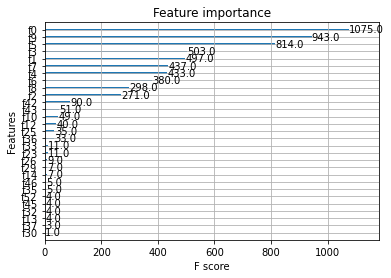

In [62]:
import matplotlib.pyplot as plt
import xgboost as xgb

# 绘制特征的相对重要性
xgb.plot_importance(model)
plt.show()

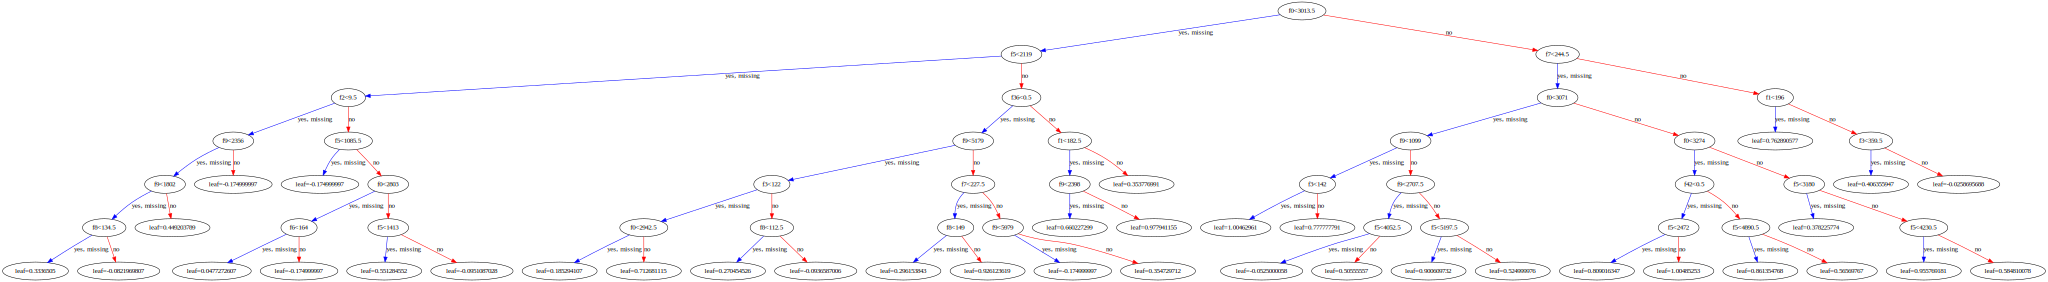

In [63]:
# 可视化lgb分割过程
xgb.to_graphviz(model)